Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
"""
Function to return Transition Matrix and State Vector of Markov Chain following Rouwenhorst’s method
@input: alpha, sigma, rho, N(states) >= 2
@output: state_vec and trans_mat
"""

def Rouwenhorst(alpha, rho, N, sigma=1):
    #Compute the state_vec
    muy = alpha/(1-rho)
    y_min = muy - sigma*np.sqrt((N-1)/(1-rho**2))
    y_max = muy + sigma*np.sqrt((N-1)/(1-rho**2))
    print("Min value: ", y_min)
    print("Max value: ", y_max)
    state_vec = np.linspace(y_min, y_max, N)

    #Compute p and q base on rho
    p = (1-rho)/2
    q = p

    trans_mat = np.array([[p, 1-p],[1-q, q]])
    if(N==2):
        return state_vec, trans_mat

    for i in range(3, N+1):
      zero_vec = np.zeros((i-1, 1))
      prev_mat = trans_mat.copy()
      trans_mat = p*np.block([[prev_mat, zero_vec],[zero_vec.T, 0]]) + \
                  (1-p)*np.block([[zero_vec, prev_mat],[0, zero_vec.T]]) + \
                  q*np.block([[0, zero_vec.T],[zero_vec, prev_mat]]) + \
                  (1-q)*np.block([[zero_vec.T, 0],[prev_mat, zero_vec]])
      trans_mat[1:-1, :] = trans_mat[1:-1, :]/2
    return state_vec, trans_mat

def check_valid(vec, mat):
  #Check condition for row sum = 1
  row_sums = np.sum(mat, axis=1)
  print("Row Sums:", row_sums)
  print("All Rows Sum to 1:", np.allclose(row_sums, 1, atol=1e-5))
  # Check for negative values
  print("Contains Negative Values:", np.any(mat < 0))

In [ ]:
vec, mat = Rouwenhorst(alpha=0.5, rho=0.85, N=7, sigma=1)
print("State vector: ")
print(vec)
print("Trans Matrix: ")
print(mat)
check_valid(vec, mat)

Min value:  -1.3165722164194378
Max value:  7.983238883086104
State vector: 
[-1.31657222  0.2333963   1.78336482  3.33333333  4.88330185  6.43327037
  7.98323888]
Trans Matrix: 
[[1.77978516e-07 1.31704102e-05 4.06087646e-04 6.67788574e-03
  6.17704431e-02 3.04734186e-01 6.26398049e-01]
 [2.19506836e-06 1.35540527e-04 3.34991821e-03 4.14510205e-02
  2.57284098e-01 6.46988197e-01 5.07890310e-02]
 [2.70725098e-05 1.33996729e-03 2.49249353e-02 2.07171636e-01
  6.59504720e-01 1.02913639e-01 4.11802954e-03]
 [3.33894287e-04 1.24353062e-02 1.55378727e-01 6.63704146e-01
  1.55378727e-01 1.24353062e-02 3.33894287e-04]
 [4.11802954e-03 1.02913639e-01 6.59504720e-01 2.07171636e-01
  2.49249353e-02 1.33996729e-03 2.70725098e-05]
 [5.07890310e-02 6.46988197e-01 2.57284098e-01 4.14510205e-02
  3.34991821e-03 1.35540527e-04 2.19506836e-06]
 [6.26398049e-01 3.04734186e-01 6.17704431e-02 6.67788574e-03
  4.06087646e-04 1.31704102e-05 1.77978516e-07]]
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1

In [ ]:
"""
Stimulate Rouwenhorst's Method with uniform distribution
@imput: num_states, rho_val, seed
@output: states, state_values
"""

def stimulate(num_states, rho_val=0.85, T=50, seed=2025):
    np.random.seed(seed)
    state_vec, trans_mat = Rouwenhorst(alpha=0.5, rho=rho_val, N=num_states, sigma=1)
    check_valid(state_vec, trans_mat)
    init_state = np.random.choice(np.arange(0, num_states)) #chose the index of first state base on uniform distribution

    states = [init_state] #array of states

    for _ in range(T-1):
      curr_state = states[-1]
      next_state = get_next_state(curr_state, trans_mat)
      states.append(next_state)
    state_values = [state_vec[i] for i in states]
    return states, state_values

def get_next_state(current_state, trans_mat):
    probabilities = trans_mat[current_state]
    u = np.random.rand()
    cumulative_probability = 0
    for state, probability in enumerate(probabilities):
        cumulative_probability += probability
        if u <= cumulative_probability:
            return state

def plot(y_values, ticker_val=0.5, T=50):
      plt.figure(figsize=(10, 5))
      plt.plot(range(T), y_values, marker='o', linestyle='-', color='b', label="γ=0.85")
      plt.xlabel("Time Period")
      plt.ylabel("State Value")
      plt.title("Simulated Markov Chain (Rouwenhorst's Method)")
      plt.grid(True)
      plt.legend()
      ax = plt.gca()
      ax.yaxis.set_major_locator(ticker.MultipleLocator(ticker_val))
      plt.show()

Min value:  -1.3165722164194378
Max value:  7.983238883086104
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1: True
Contains Negative Values: False


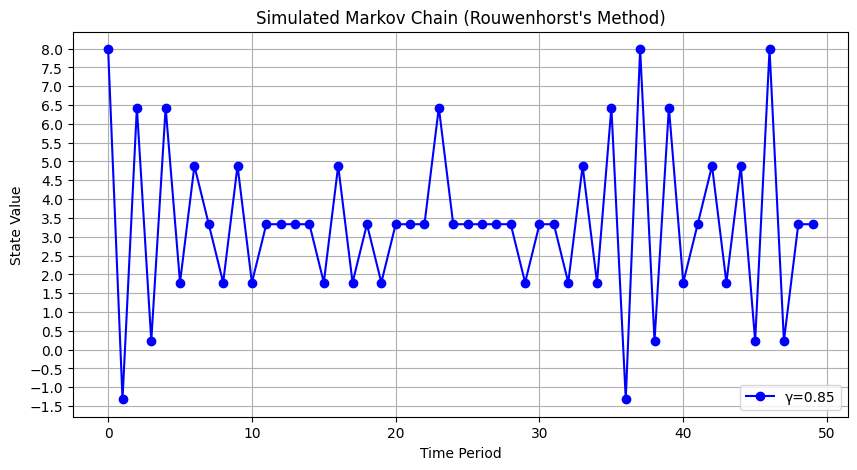

In [ ]:
states, y_values = stimulate(num_states=7)
plot(y_values)

Rho:  0.75
Min value:  -1.7032803990902057
Max value:  5.703280399090206
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1: True
Contains Negative Values: False
------------------------------
Rho:  0.85
Min value:  -1.3165722164194378
Max value:  7.983238883086104
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1: True
Contains Negative Values: False
------------------------------
Rho:  0.95
Min value:  2.155354594472631
Max value:  17.844645405527352
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1: True
Contains Negative Values: False
------------------------------
Rho:  0.99
Min value:  32.63602759480299
Max value:  67.36397240519693
Row Sums: [1. 1. 1. 1. 1. 1. 1.]
All Rows Sum to 1: True
Contains Negative Values: False
------------------------------


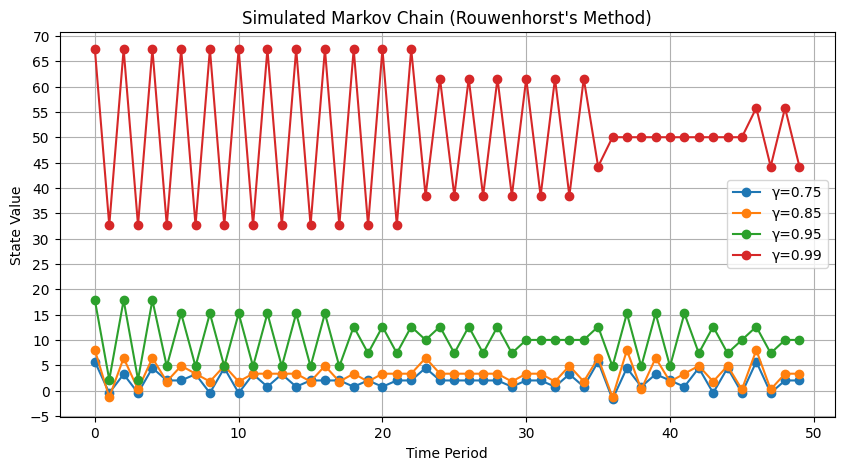

In [ ]:
# Generate values base on rho

rhos = [0.75,0.85,0.95,0.99]

state_val_array = []

for rho in rhos:
    print("Rho: ", rho)
    states, state_values = stimulate(num_states=7, rho_val=rho)
    state_val_array.append(state_values)
    print("------------------------------")

plt.figure(figsize=(10, 5))
# Show plot
for i, state_values in enumerate(state_val_array):
    plt.plot(range(50), state_values, marker='o', linestyle='-', label=f"γ={rhos[i]}")

plt.xlabel("Time Period")
plt.ylabel("State Value")
plt.title("Simulated Markov Chain (Rouwenhorst's Method)")
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()